# Binary Classification Using Handcrafted Features and ML Classifiers

### First Approach

In [1]:
import cv2
import os
import numpy as np
import mahotas as mt
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Loading image
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resizeing for consistency
            images.append(img)
            labels.append(label)
    
    return images, labels

# Loading both categories
with_mask_images, with_mask_labels = load_images_from_folder("../dataset/with_mask", 1)
without_mask_images, without_mask_labels = load_images_from_folder("../dataset/without_mask", 0)

# Combining datasets
X_images = with_mask_images + without_mask_images
y_labels = with_mask_labels + without_mask_labels


In [3]:
def extract_hog_features(image):
    gray = rgb2gray(image)  # Converting to grayscale
    features, _ = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

In [4]:
def extract_lbp_features(image, radius=1, n_points=8):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist


In [5]:
def extract_canny_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Applying Canny edge detection
    return edges.flatten()  # Flattening the edge image into a feature vector


In [6]:
def extract_color_histogram(image, bins=32):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting to HSV
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    return hist.flatten()


In [7]:
def extract_features(image):
    hog_feat = extract_hog_features(image)
    lbp_feat = extract_lbp_features(image)
    canny_feat = extract_canny_features(image)
    color_hist_feat = extract_color_histogram(image)

    # Concatenating all features into one feature vector
    feature_vector = np.hstack((hog_feat, lbp_feat, canny_feat, color_hist_feat))
    return feature_vector

# Extracting features from all images
X_features = np.array([extract_features(img) for img in X_images])
y = np.array(y_labels)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.9263803680981595
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       362
           1       0.95      0.92      0.93       453

    accuracy                           0.93       815
   macro avg       0.92      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
import joblib

# Saving the trained model
joblib.dump(svm_model, "svm_mask_classifier.pkl")
print("Model saved successfully!")


Model saved successfully!


In [13]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [14]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation="relu")
mlp_model.fit(X_train, y_train)

mlp_preds = mlp_model.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("MLP Accuracy:", mlp_acc)
print(classification_report(y_test, mlp_preds))


MLP Accuracy: 0.9251533742331288
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       362
           1       0.94      0.92      0.93       453

    accuracy                           0.93       815
   macro avg       0.92      0.93      0.92       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
# Saving the trained model
joblib.dump(mlp_model, "mlp_mask_classifier.pkl")
print("Model saved successfully!")


Model saved successfully!


In [16]:
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")


SVM Accuracy: 0.9264
MLP Accuracy: 0.9252


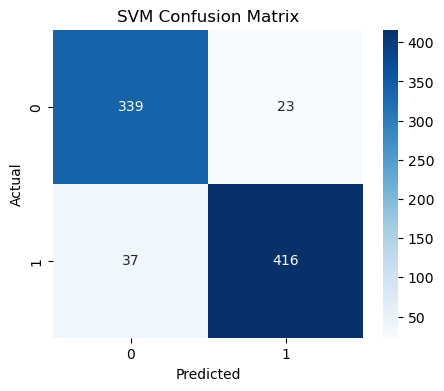

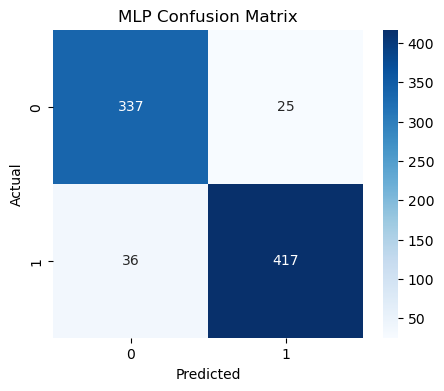

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, mlp_preds, "MLP Confusion Matrix")


### Second Approach

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Loading image
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resizing for consistency
            images.append(img)
            labels.append(label)
    
    return images, labels

# Loading both categories
with_mask_images, with_mask_labels = load_images_from_folder("../dataset/with_mask", 1)
without_mask_images, without_mask_labels = load_images_from_folder("../dataset/without_mask", 0)

# Combining datasets
X_images = with_mask_images + without_mask_images
y_labels = with_mask_labels + without_mask_labels


In [ ]:
def extract_hog_features(image):
    gray = rgb2gray(image)  # Converting to grayscale
    features, _ = hog(gray, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True)     # adjusting pixels_per_cell and cells_per_block
    return features

In [ ]:
def extract_lbp_features(image, radius=2, n_points=16):     # adjusting radius and n_points
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist


In [ ]:
def extract_canny_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)  # Applying Canny edge detection      # adjusting parameters
    return edges.flatten()  # Flattening the edge image into a feature vector


In [ ]:
def extract_color_histogram(image, bins=32):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting to HSV
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    return hist.flatten()


In [ ]:
def extract_features(image):
    hog_feat = extract_hog_features(image)
    lbp_feat = extract_lbp_features(image)
    canny_feat = extract_canny_features(image)
    color_hist_feat = extract_color_histogram(image)

    # Concatenating all features into one feature vector
    feature_vector = np.hstack((hog_feat, lbp_feat, canny_feat, color_hist_feat))
    return feature_vector

# Extracting features from all images
X_features = np.array([extract_features(img) for img in X_images])
y = np.array(y_labels)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.9447852760736196
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       362
           1       0.96      0.94      0.95       453

    accuracy                           0.94       815
   macro avg       0.94      0.95      0.94       815
weighted avg       0.95      0.94      0.94       815



In [ ]:
import joblib

# Saving the trained model
joblib.dump(svm_model, "svm_mask_classifier_modified.pkl")
print("Model saved successfully!")


Model saved successfully!


In [27]:
joblib.dump(scaler, "scaler_modified.pkl")

['scaler_modified.pkl']

In [28]:
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, activation="relu")
mlp_model.fit(X_train, y_train)

mlp_preds = mlp_model.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("MLP Accuracy:", mlp_acc)
print(classification_report(y_test, mlp_preds))


MLP Accuracy: 0.9312883435582822
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       362
           1       0.95      0.93      0.94       453

    accuracy                           0.93       815
   macro avg       0.93      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



In [ ]:
# Saving the trained model
joblib.dump(mlp_model, "mlp_mask_classifier_modified.pkl")
print("Model saved successfully!")


Model saved successfully!


In [30]:
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")


SVM Accuracy: 0.9448
MLP Accuracy: 0.9313


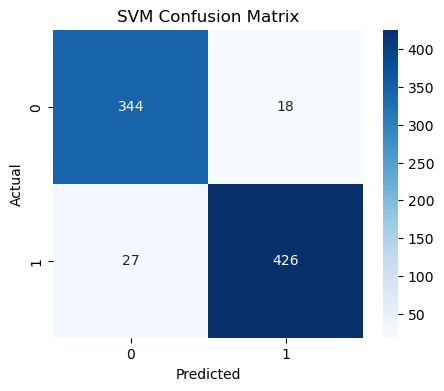

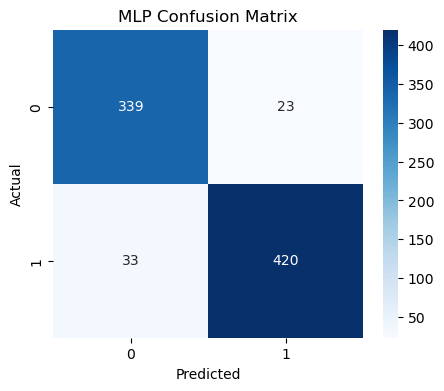

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, mlp_preds, "MLP Confusion Matrix")


### Third Approach

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Loading image
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resizing for consistency
            images.append(img)
            labels.append(label)
    
    return images, labels

# Loading both categories
with_mask_images, with_mask_labels = load_images_from_folder("../dataset/with_mask", 1)
without_mask_images, without_mask_labels = load_images_from_folder("../dataset/without_mask", 0)

# Combining datasets
X_images = with_mask_images + without_mask_images
y_labels = with_mask_labels + without_mask_labels


In [4]:
def extract_hog_features(image):
    gray = rgb2gray(image)  # Converting to grayscale
    features, _ = hog(gray, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True)     # adjusting pixels_per_cell and cells_per_block
    return features

In [5]:
def extract_lbp_features(image, radius=2, n_points=16):     # adjusting radius and n_points
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist


In [6]:
def extract_canny_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)  # Applying Canny edge detection      # adjusting parameters
    return edges.flatten()  # Flattening the edge image into a feature vector


In [7]:
def extract_color_histogram(image, bins=32):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting to HSV
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    return hist.flatten()


In [8]:
def extract_features(image):
    hog_feat = extract_hog_features(image)
    lbp_feat = extract_lbp_features(image)
    canny_feat = extract_canny_features(image)
    color_hist_feat = extract_color_histogram(image)

    # Concatenating all features into one feature vector
    feature_vector = np.hstack((hog_feat, lbp_feat, canny_feat, color_hist_feat))
    return feature_vector

# Extracting features from all images
X_features = np.array([extract_features(img) for img in X_images])
y = np.array(y_labels)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale") # Modifiying the kernel type and other parameters
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.9226993865030675
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       362
           1       0.90      0.97      0.93       453

    accuracy                           0.92       815
   macro avg       0.93      0.92      0.92       815
weighted avg       0.93      0.92      0.92       815



In [11]:
import joblib

# Saving the trained model
joblib.dump(svm_model, "svm_mask_classifier_2.pkl")
print("Model saved successfully!")


Model saved successfully!


In [12]:
joblib.dump(scaler, "scaler_2.pkl")

['scaler_2.pkl']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Converting dataset to float32 (Reduces memory usage)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Enabling GPU
xgb = XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")

# Defining hyperparameters
param_grid = {
    'n_estimators': [100, 150],  
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 6],  
}

# Performing GridSearchCV with n_jobs=1 to reduce RAM usage
grid_search = GridSearchCV(
    xgb,
    param_grid,
    scoring='accuracy',
    cv=2,
    verbose=2,
    n_jobs=1  # Avoiding parallel execution to prevent memory overflow
)

# Fit model using GPU
grid_search.fit(X_train, y_train)

# Best parameters and model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 1.4min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=  53.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=  52.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=  51.6s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time= 1.0min
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time= 1.5min
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time= 1.9min
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time= 1.7min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time= 1.1min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time= 1.2min
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=150; total time=  45.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_est

In [11]:
import joblib
# Saving the trained model
joblib.dump(best_xgb, "xgb_mask_classifier.pkl")
print("Model saved successfully!")


Model saved successfully!


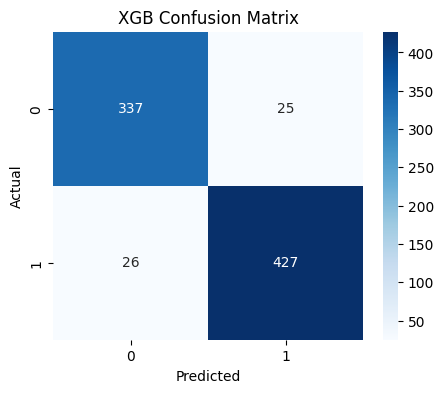

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, "XGB Confusion Matrix")


# Binary Classification Using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
directory1_path = '/content/drive/MyDrive/dataset/with_mask'
directory2_path = '/content/drive/MyDrive/dataset/without_mask'

print(f"Directory 1 path: {directory1_path}")
print(f"Directory 2 path: {directory2_path}")


Directory 1 path: /content/drive/MyDrive/dataset/with_mask
Directory 2 path: /content/drive/MyDrive/dataset/without_mask


In [ ]:
# Install dependencies if needed (optional)
!pip install tensorflow numpy matplotlib opencv-python seaborn

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Clone the dataset repository
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

# Define dataset path
dataset_path = "/content/Face-Mask-Detection/dataset"

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 23.85 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [ ]:
IMG_SIZE = 128  # Set image size
data = []
labels = []

# Load images from dataset
for category in ["with_mask", "without_mask"]:
    folder = os.path.join(dataset_path, category)
    label = 1 if category == "with_mask" else 0  # 1 for mask, 0 for no mask

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
        data.append(img)
        labels.append(label)

# Convert to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixels (0-1)
labels = np.array(labels)

print("Dataset loaded successfully!")
print(f"Total samples: {len(labels)}")

Dataset loaded successfully!
Total samples: 4095


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples: {len(y_train)}")
print(f"Testing samples: {len(y_test)}")

Training samples: 3276
Testing samples: 819


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6968 - loss: 0.5864 - val_accuracy: 0.9255 - val_loss: 0.2097
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8881 - loss: 0.2867 - val_accuracy: 0.9206 - val_loss: 0.2156
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9181 - loss: 0.2185 - val_accuracy: 0.9389 - val_loss: 0.1690
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9313 - loss: 0.1909 - val_accuracy: 0.9451 - val_loss: 0.1389
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9593 - loss: 0.1151 - val_accuracy: 0.9499 - val_loss: 0.1115
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9584 - loss: 0.1069 - val_accuracy: 0.9512 - val_loss: 0.1116
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9664 - loss: 0.1028 - val_accuracy: 0.9389 - val_loss: 0.1740
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9685 - loss: 0.0878 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.9597 - loss: 0.1096
Test Accuracy: 0.9585


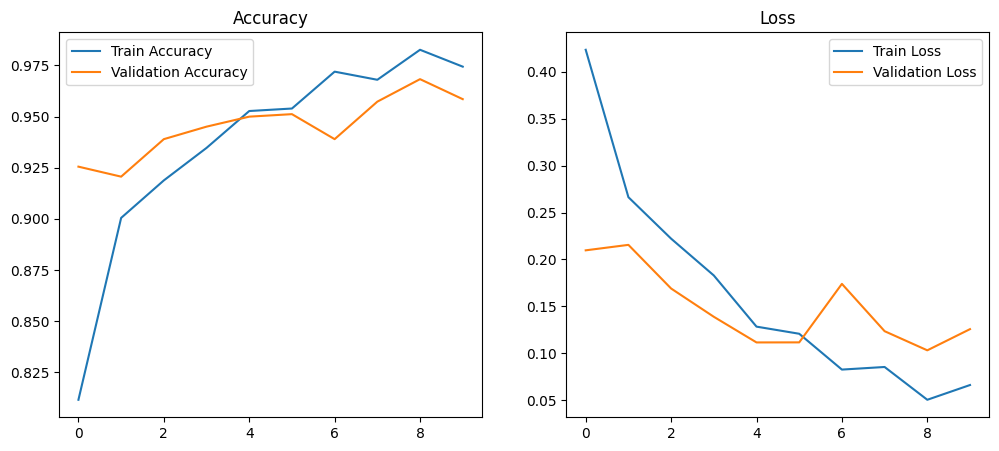

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step


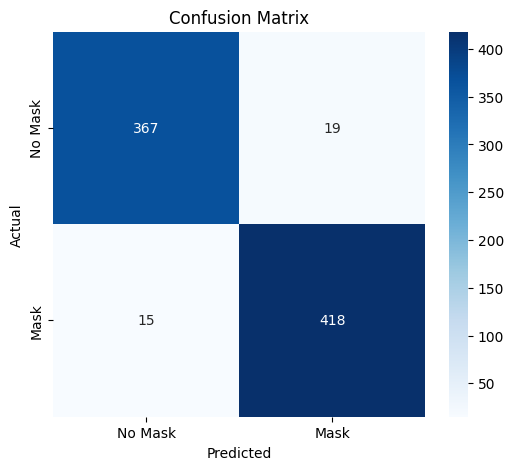

              precision    recall  f1-score   support

     No Mask       0.96      0.95      0.96       386
        Mask       0.96      0.97      0.96       433

    accuracy                           0.96       819
   macro avg       0.96      0.96      0.96       819
weighted avg       0.96      0.96      0.96       819



In [ ]:
# Get predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Mask", "Mask"], yticklabels=["No Mask", "Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["No Mask", "Mask"]))

In [ ]:
for lr in [0.001, 0.0001]:
    print(f"\nTraining with Learning Rate: {lr}")

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy with LR {lr}: {test_acc:.4f}")


Training with Learning Rate: 0.001
Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9818 - loss: 0.0678 - val_accuracy: 0.9609 - val_loss: 0.1365
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9857 - loss: 0.0316 - val_accuracy: 0.9695 - val_loss: 0.1245
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9670 - val_loss: 0.1328
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9621 - val_loss: 0.1420
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9585 - val_loss: 0.1368
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.9633 - loss: 0.1191
Test Accuracy with LR 0.001: 0.9585

Training with Learning Rate: 0.0001
Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9978 - loss: 0.0105 - val_accuracy: 0.9707 - val_loss: 0.1412
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/s

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/mask_detection_model_00001.h5')

# Save the training history (optional)
import json
with open('/content/drive/MyDrive/training_history.json', 'w') as f:
    json.dump(history.history, f)
